---
# <center> <font size="15"> <font color='red'>**Effect of the safety factor on SOLEDGE simulations**</font></font>
---

___
___
## <font color='coral'>**Appel de l'environment et chargement des données** </font> 

In [1]:
%reset -f
import ipywidgets as widgets
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.ndimage.filters import uniform_filter1d, gaussian_filter1d
from IPython.display import clear_output

## For sliders
from ipywidgets import Layout, interact

## Set up rc
plt.rcParams['image.cmap'] = 'RdYlBu_r'
plt.rcParams['axes.formatter.limits'] = (-3,1)
plt.rcParams['lines.linewidth'] = 2.5
plt.rcParams.update({"axes.grid" : True})
plt.rcParams['lines.markersize'] = 8
plt.rcParams['lines.markeredgecolor'] = 'k'
plt.rcParams['lines.markeredgewidth'] = 2.0
plt.rc('font',size=18)
me = (0.1,0.1) #Markevery

import h5py

def hdf5_to_dict(filename):
    """Load a dictionary of arrays and strings as unicode characters from an HDF5 file."""
    with h5py.File(filename, 'r') as f:
        d = {}
        for k in f.keys():
            v = f[k][()]
            if isinstance(v, bytes):
                d[k] = v.decode('utf-8')
            else:
                d[k] = np.array(v)
    return d

C:\Users\RV273815\AppData\Local\Temp\ipykernel_248\1906815440.py:8: DeprecationWarning: Please use `uniform_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter1d, gaussian_filter1d
C:\Users\RV273815\AppData\Local\Temp\ipykernel_248\1906815440.py:8: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter1d, gaussian_filter1d


## <font color='coral'>**Chargement des données** </font> 

In [2]:
## Load simulation where we restart at t=633453.304418016 changing Bpol from 1 to 2
#S3X_data = hdf5_to_dict('data_S3X/data_allsim.h5'); S3X_data['title']=r'Restart $B_{pol}=2'; S3X_data['c']='xkcd:pinky red'; S3X_data['ls']='-'; S3X_data['time_activation']=633453.304418016
S3X_data = hdf5_to_dict('data_S3X/data_allsim_new.h5'); S3X_data['title']=r'Restart $B_{pol}=2'; S3X_data['c']='xkcd:pinky red'; S3X_data['ls']='-'; S3X_data['time_activation']=633453.304418016

print(S3X_data.keys())
print(S3X_data['time'][0])

dict_keys(['T_FSavg', 'VExB_th_FSavg', 'n_FSavg', 'phi_FSavg', 'time', 'title', 'c', 'ls', 'time_activation'])
633453.3044180159


___
___

## <font color='xkcd:sage'>**Exploration**</font> - Profil radial (video)

interactive(children=(Select(description='keys', index=1, layout=Layout(height='220px', width='50%'), options=…

<function __main__.update_plot(keys, it_play, time_slider)>

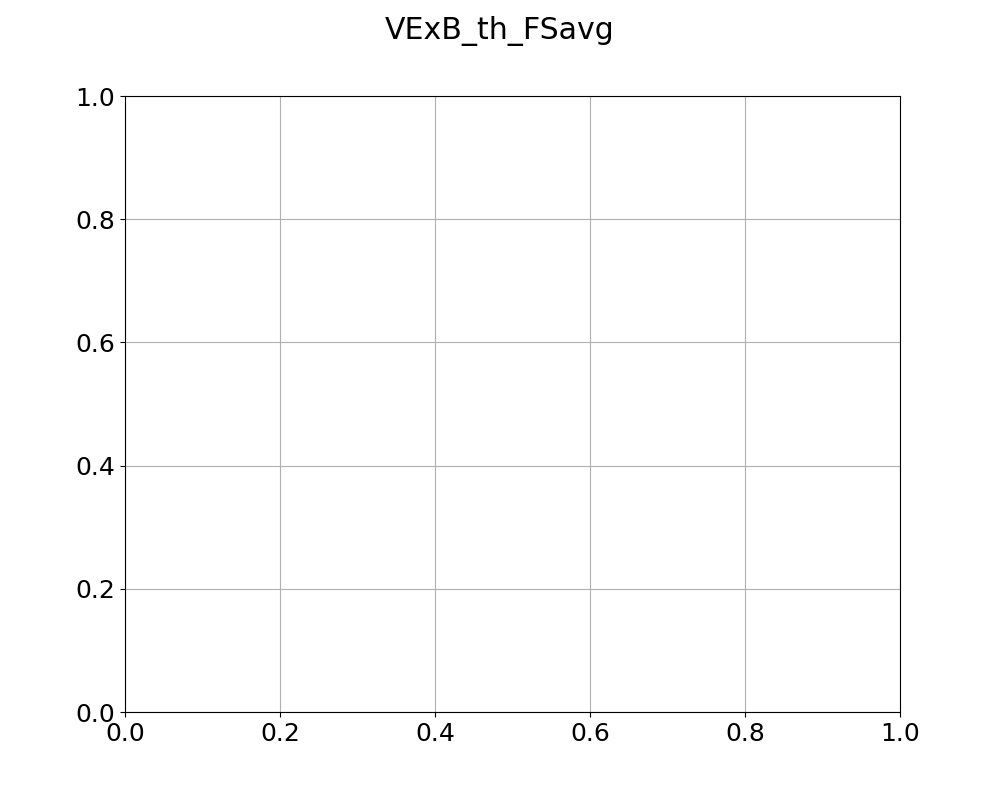

In [7]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)


def update_plot(keys,it_play,time_slider):
    fig.suptitle(keys)
    ax.clear()

    ## Define radial coordinate array (temp)
    rho_ar = np.linspace(0.7,1,S3X_data[keys].shape[1])
    #it = np.argmin(np.abs(S3X_data['time']-time))

    ax.plot(rho_ar, S3X_data[keys][it_play,:], c=S3X_data['c'], ls=S3X_data['ls'], label=S3X_data['title'])
    ax.set_title(r'$t=%d [\omega_{c0}^{-1}]$' % S3X_data['time'][it_play])

    ax.set_xlabel(r'$r/a$')
    ax.axhline(y=0, c='k', ls='--')
    ax.axvline(x=1, c='k', ls='--')

    if S3X_data['time'][it_play] < S3X_data['time_activation']:
        ax.text(0.2, 0.9, r'$B_{pol} = 1$', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20, color='g', bbox=dict(facecolor='w', edgecolor='g', alpha=1))
    else:
        ax.text(0.2, 0.9, r'$B_{pol} = 2$', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20, color='r', bbox=dict(facecolor='w', edgecolor='r', alpha=1))

    ax.set_ylim(np.amin(S3X_data[keys]), np.amax(S3X_data[keys]))

keys_widget = widgets.Select(options=list(S3X_data), value='VExB_th_FSavg', layout=Layout(width='50%', height='220px'))
time_widget = widgets.FloatSlider(min=S3X_data['time'].min(), max=S3X_data['time'].max(), step=1, value=0.0, continuous_update=True, layout=Layout(width='50%', height='220px'))

slider = widgets.IntSlider(value=0,min=0,max=len(S3X_data['time']),step=1,description="Time index",layout=Layout(width='50%'))
play   = widgets.Play(value=785,min=0, max=len(S3X_data['time']),step=1,interval=200,description="Press play")

widgets.jslink((play, 'value'), (slider, 'value'))

interact(update_plot, 
         keys = keys_widget,
         it_play=play,
         time_slider = slider,
         #time = time_widget
        )

## <font color='xkcd:sage'>**Exploration**</font> - Profil radial (mosaique de vidéos)

interactive(children=(Play(value=0, description='Press play', interval=200, max=70), IntSlider(value=0, descri…

<function __main__.update_plot(it_play, time_slider)>

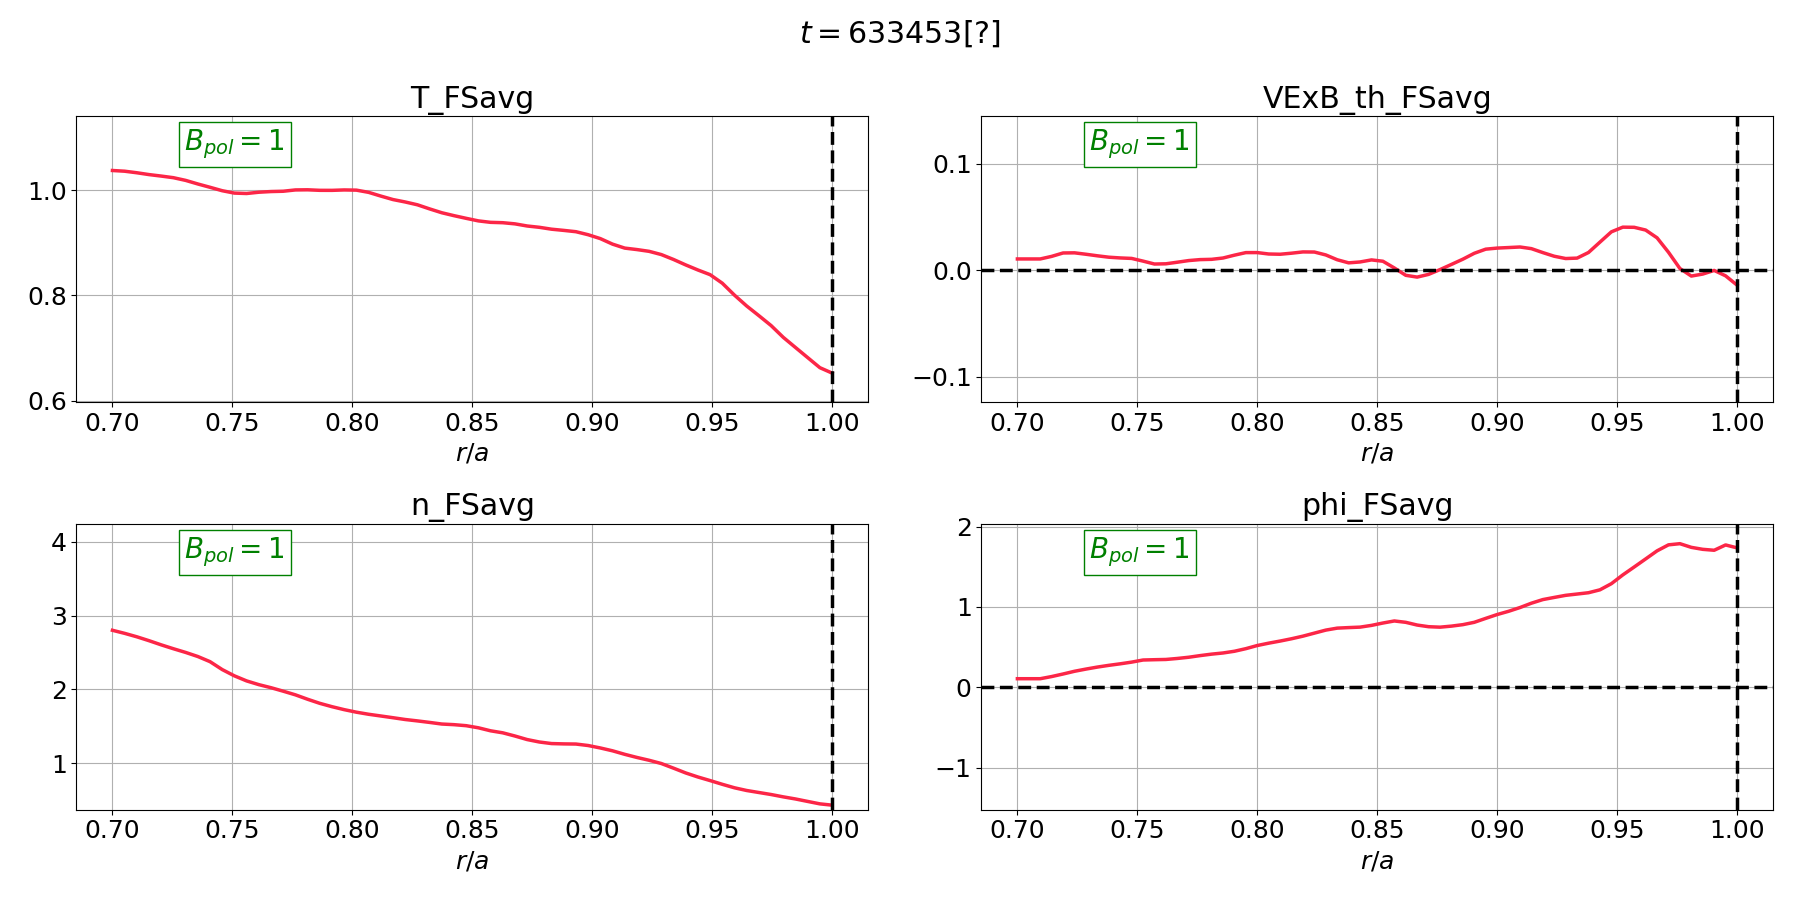

In [9]:
fig = plt.figure(figsize=(18,9))

keys_ar = ['T_FSavg', 'VExB_th_FSavg', 'n_FSavg', 'phi_FSavg']
ax_ar = []
for i in range(len(keys_ar)):
    ax = fig.add_subplot(2,2,i+1)
    ax_ar.append(ax)

def update_plot(it_play,time_slider):
    
    fig.suptitle(r'$t=%d [\omega_{c0}^{-1}]$' % S3X_data['time'][it_play])

    for ikey, keys in enumerate(keys_ar):
        rho_ar = np.linspace(0.7,1,S3X_data[keys].shape[1])
        ax=ax_ar[ikey]
        ax.clear()
        ax.plot(rho_ar, S3X_data[keys][it_play,:], c=S3X_data['c'], ls=S3X_data['ls'], label=S3X_data['title'])
        
        ax.set_title(keys)
        ax.set_xlabel(r'$r/a$')
        ax.axhline(y=0, c='k', ls='--')
        ax.axvline(x=1, c='k', ls='--')

        if S3X_data['time'][it_play] < S3X_data['time_activation']:
            ax.text(0.2, 0.9, r'$B_{pol} = 1$', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20, color='g', bbox=dict(facecolor='w', edgecolor='g', alpha=1))
        else:
            ax.text(0.2, 0.9, r'$B_{pol} = 2$', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20, color='r', bbox=dict(facecolor='w', edgecolor='r', alpha=1))

        ax.set_ylim(np.amin(S3X_data[keys])*1.1, np.amax(S3X_data[keys])*1.1)
    
    fig.tight_layout()

slider = widgets.IntSlider(value=0,min=0,max=len(S3X_data['time']),step=1,description="Time index",layout=Layout(width='50%'))
#play   = widgets.Play(value=785,min=0, max=len(S3X_data['time']),step=1,interval=200,description="Press play")
play   = widgets.Play(value=0,min=0, max=len(S3X_data['time']),step=1,interval=200,description="Press play")

widgets.jslink((play, 'value'), (slider, 'value'))

interact(update_plot, 

         it_play=play,
         time_slider = slider,
         #time = time_widget
        )

## <font color='red'>**Résultat**</font> - Profil initial et final

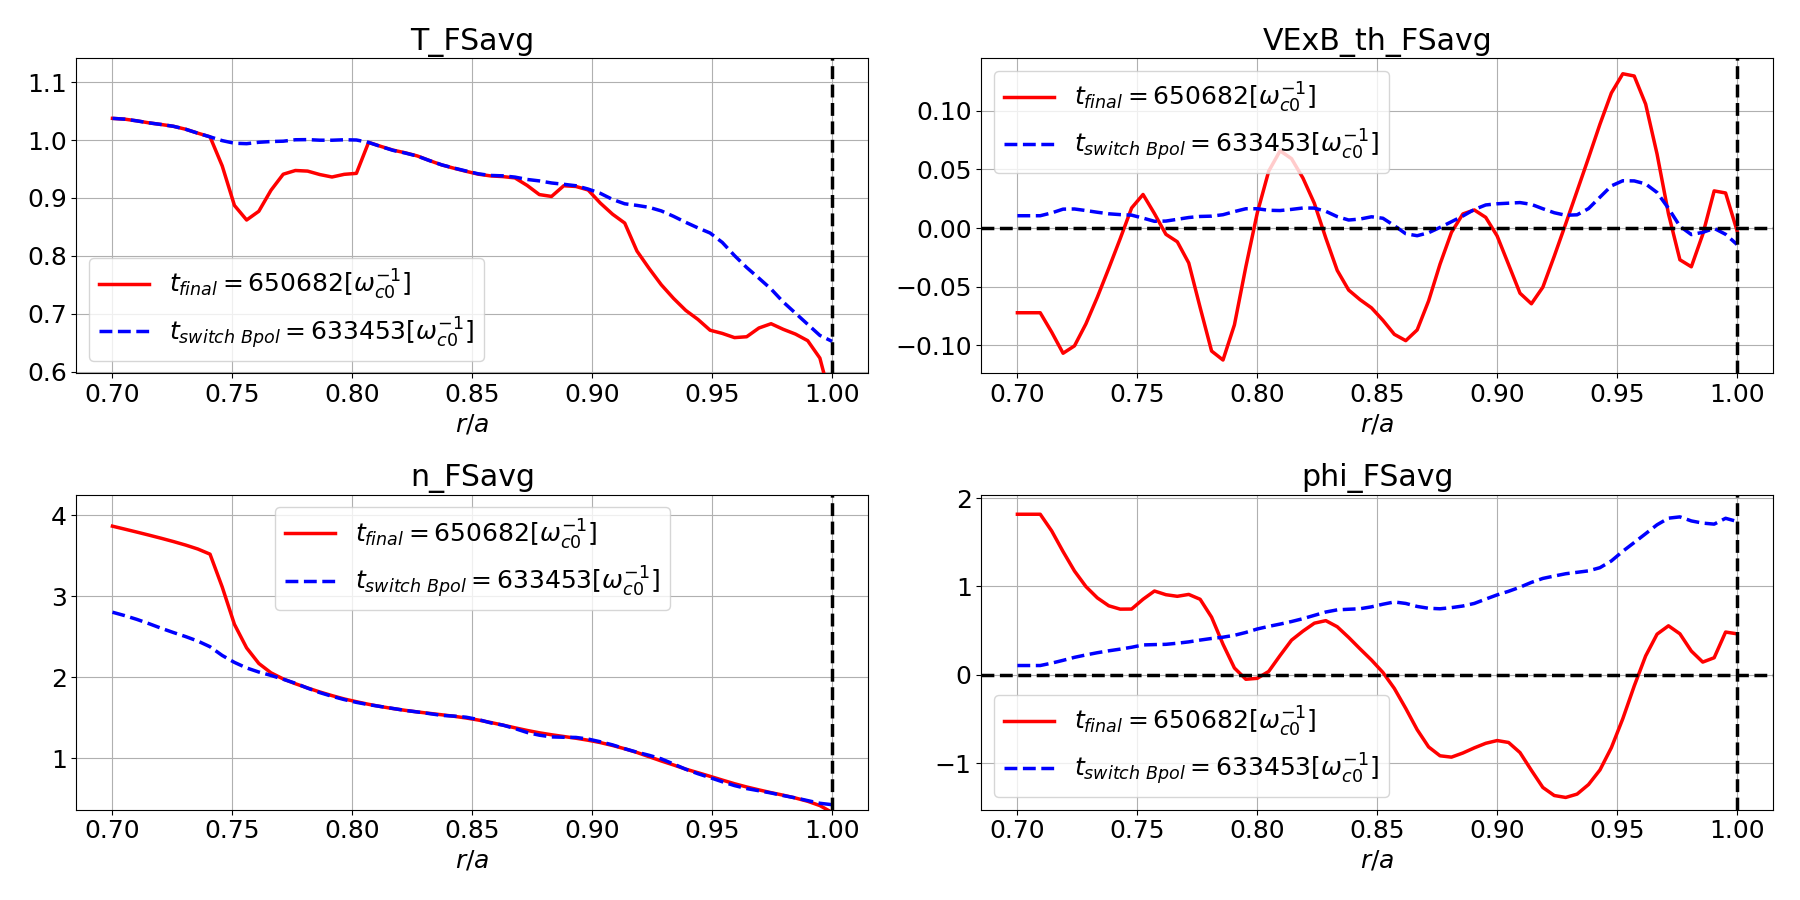

In [11]:
fig = plt.figure(figsize=(18,9))

keys_ar = ['T_FSavg', 'VExB_th_FSavg', 'n_FSavg', 'phi_FSavg']
ax_ar = []
for i in range(len(keys_ar)):
    ax = fig.add_subplot(2,2,i+1)
    ax_ar.append(ax)

for ikey, keys in enumerate(keys_ar):
    rho_ar = np.linspace(0.7,1,S3X_data[keys].shape[1])
    ax=ax_ar[ikey]
    ax.clear()

    it_activation = np.argmin(np.abs(S3X_data['time'] - S3X_data['time_activation']))

    ax.plot(rho_ar, S3X_data[keys][-1,:], c='r', ls='-', label=r'$t_{final} = %d [\omega_{c0}^{-1}]$' % S3X_data['time'][-1])
    ax.plot(rho_ar, S3X_data[keys][it_activation,:], c='b', ls='--', label=r'$t_{switch~Bpol} = %d [\omega_{c0}^{-1}]$' % S3X_data['time_activation'])
    
    ax.set_title(keys)
    ax.set_xlabel(r'$r/a$')
    ax.axhline(y=0, c='k', ls='--')
    ax.axvline(x=1, c='k', ls='--')
    ax.legend()

    ax.set_ylim(np.amin(S3X_data[keys])*1.1, np.amax(S3X_data[keys])*1.1)

fig.tight_layout()



## <font color='red'>**Résultat**</font> - Evolution temporelle

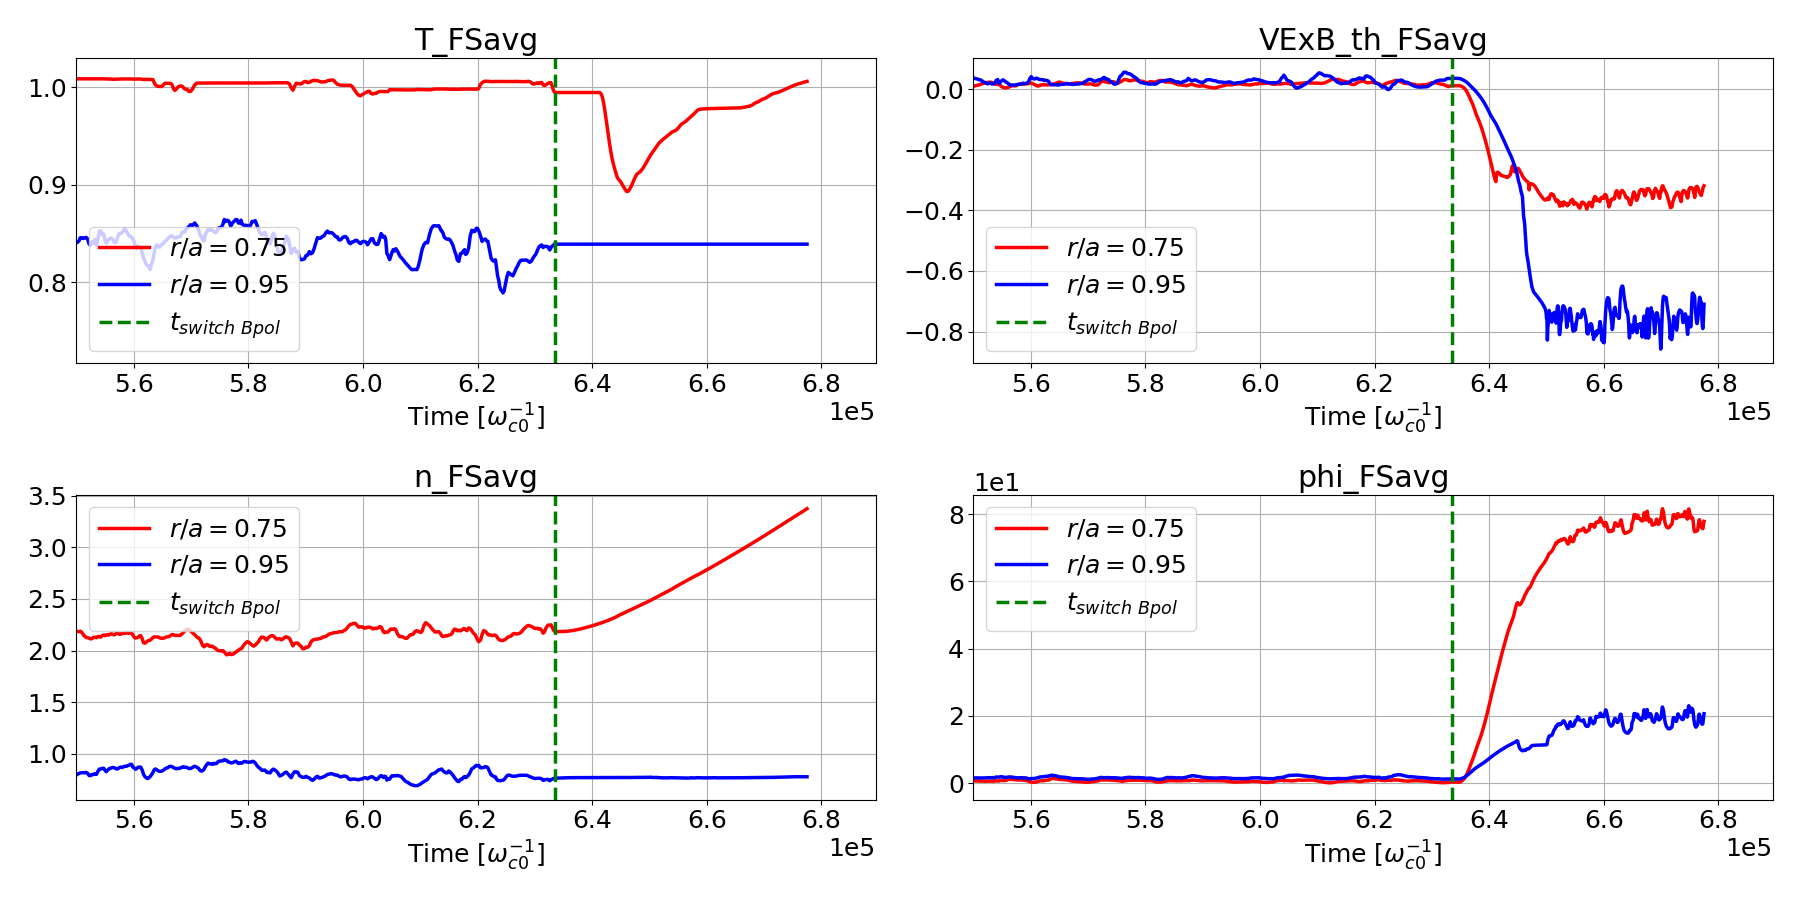

In [4]:
fig = plt.figure(figsize=(18,9))

keys_ar = ['T_FSavg', 'VExB_th_FSavg', 'n_FSavg', 'phi_FSavg']
ax_ar = []
for i in range(len(keys_ar)):
    ax = fig.add_subplot(2,2,i+1)
    ax_ar.append(ax)

for ikey, keys in enumerate(keys_ar):
    rho_ar = np.linspace(0.7,1,S3X_data[keys].shape[1])
    ax=ax_ar[ikey]
    ax.clear()

    irho = np.argmin(np.abs(rho_ar - 0.75))
    irho2 = np.argmin(np.abs(rho_ar - 0.95))

    ax.plot(S3X_data['time'], S3X_data[keys][:,irho], c='r', ls='-', label=r'$r/a = %.2f$' % rho_ar[irho])
    ax.plot(S3X_data['time'], S3X_data[keys][:,irho2], c='b', ls='-', label=r'$r/a = %.2f$' % rho_ar[irho2])
    
    ax.set_title(keys)
    ax.set_xlabel(r'Time $[\omega_{c0}^{-1}]$')
    #ax.axhline(y=0, c='k', ls='--')
    ax.axvline(x=S3X_data['time_activation'], c='g', ls='--', label=r'$t_{switch~Bpol}$')
    ax.legend()

    ax.set_xlim(left=550000)

    #ax.set_ylim(np.amin(S3X_data[keys])*1.1, np.amax(S3X_data[keys])*1.1)

fig.tight_layout()


## <font color='coral'>**En cours**</font> - Evolution temporelle entre cas Lphi_div=4 et 8

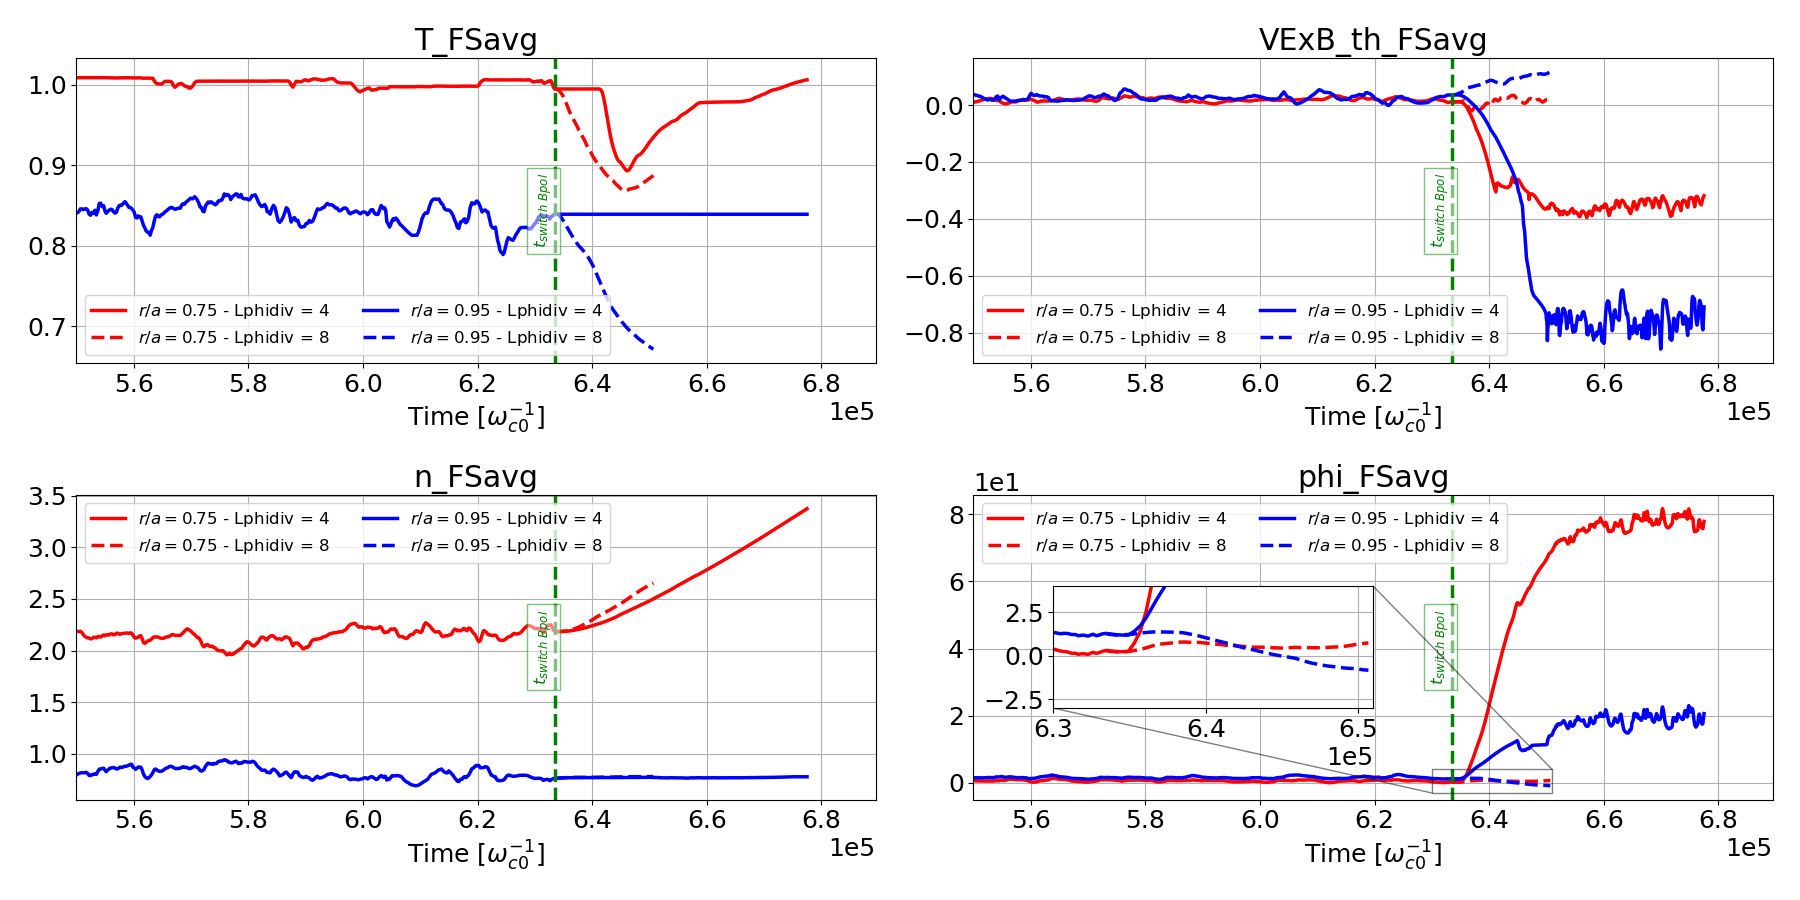

In [44]:
S3X_data     = hdf5_to_dict('data_S3X/data_allsim.h5'); S3X_data['title']=r'Restart $B_{pol}=2'; S3X_data['c']='xkcd:pinky red'; S3X_data['ls']='-'; S3X_data['time_activation']=633453.304418016; S3X_data['Lphidiv']=4
S3X_data_new = hdf5_to_dict('data_S3X/data_allsim_new.h5'); S3X_data_new['title']=r'Restart $B_{pol}=2'; S3X_data_new['c']='xkcd:pinky red'; S3X_data_new['ls']='-'; S3X_data['time_activation']=633453.304418016; S3X_data_new['Lphidiv']=8

fig = plt.figure(figsize=(18,9))

keys_ar = ['T_FSavg', 'VExB_th_FSavg', 'n_FSavg', 'phi_FSavg']
ax_ar = []
for i in range(len(keys_ar)):
    ax = fig.add_subplot(2,2,i+1)
    ax_ar.append(ax)

for ikey, keys in enumerate(keys_ar):
    rho_ar = np.linspace(0.7,1,S3X_data[keys].shape[1])
    ax=ax_ar[ikey]
    ax.clear()

    irho = np.argmin(np.abs(rho_ar - 0.75))
    irho2 = np.argmin(np.abs(rho_ar - 0.95))

    ax.plot(S3X_data['time'], S3X_data[keys][:,irho], c='r', ls='-', label=r'$r/a = %.2f$ - Lphidiv = %s' % (rho_ar[irho], S3X_data['Lphidiv']) )
    ax.plot(S3X_data_new['time'], S3X_data_new[keys][:,irho], c='r', ls='--', label=r'$r/a = %.2f$ - Lphidiv = %s' % (rho_ar[irho], S3X_data_new['Lphidiv']) )

    ax.plot(S3X_data['time'], S3X_data[keys][:,irho2], c='b', ls='-', label=r'$r/a = %.2f$ - Lphidiv = %s' % (rho_ar[irho2], S3X_data['Lphidiv']) )
    ax.plot(S3X_data_new['time'], S3X_data_new[keys][:,irho2], c='b', ls='--', label=r'$r/a = %.2f$ - Lphidiv = %s' % (rho_ar[irho2], S3X_data_new['Lphidiv']) )

    ax.set_title(keys)
    ax.set_xlabel(r'Time $[\omega_{c0}^{-1}]$')
    #ax.axhline(y=0, c='k', ls='--')
    ax.axvline(x=S3X_data['time_activation'], c='g', ls='--')
    ## Add text next to the line oriented at 90 degrees
    ymin, ymax = ax.get_ylim()
    ax.text(S3X_data['time_activation'], (ymin+ymax)/2 , r'$t_{switch~Bpol}$', rotation=90, verticalalignment='center', 
            horizontalalignment='right', fontsize=12, color='g', bbox=dict(facecolor='white', edgecolor='g', alpha=0.5))

    if keys == 'phi_FSavg':
        ## add an ax inset to zoom in on the phi_FSavg
        axins = ax.inset_axes([0.1, 0.3, 0.4, 0.4])
        ## sub region of the original image
        x1, x2, y1, y2 = 630000, 651000, -3, 4
        axins.set_xlim(x1, x2)
        axins.set_ylim(y1, y2)
        axins.plot(S3X_data['time'], S3X_data[keys][:,irho], c='r', ls='-', label=r'$r/a = %.2f$ - Lphidiv = %s' % (rho_ar[irho], S3X_data['Lphidiv']) )
        axins.plot(S3X_data_new['time'], S3X_data_new[keys][:,irho], c='r', ls='--', label=r'$r/a = %.2f$ - Lphidiv = %s' % (rho_ar[irho], S3X_data_new['Lphidiv']) )
        axins.plot(S3X_data['time'], S3X_data[keys][:,irho2], c='b', ls='-', label=r'$r/a = %.2f$ - Lphidiv = %s' % (rho_ar[irho2], S3X_data['Lphidiv']) )
        axins.plot(S3X_data_new['time'], S3X_data_new[keys][:,irho2], c='b', ls='--', label=r'$r/a = %.2f$ - Lphidiv = %s' % (rho_ar[irho2], S3X_data_new['Lphidiv']) )
        ax.indicate_inset_zoom(axins, edgecolor="black")


    ax.legend(fontsize=12, ncol=2)

    ax.set_xlim(left=550000)

    #ax.set_ylim(np.amin(S3X_data[keys])*1.1, np.amax(S3X_data[keys])*1.1)

fig.tight_layout()


## <font color='coral'>**En cours**</font> - Profil radial initial/final entre cas Lphi_div=4 et 8

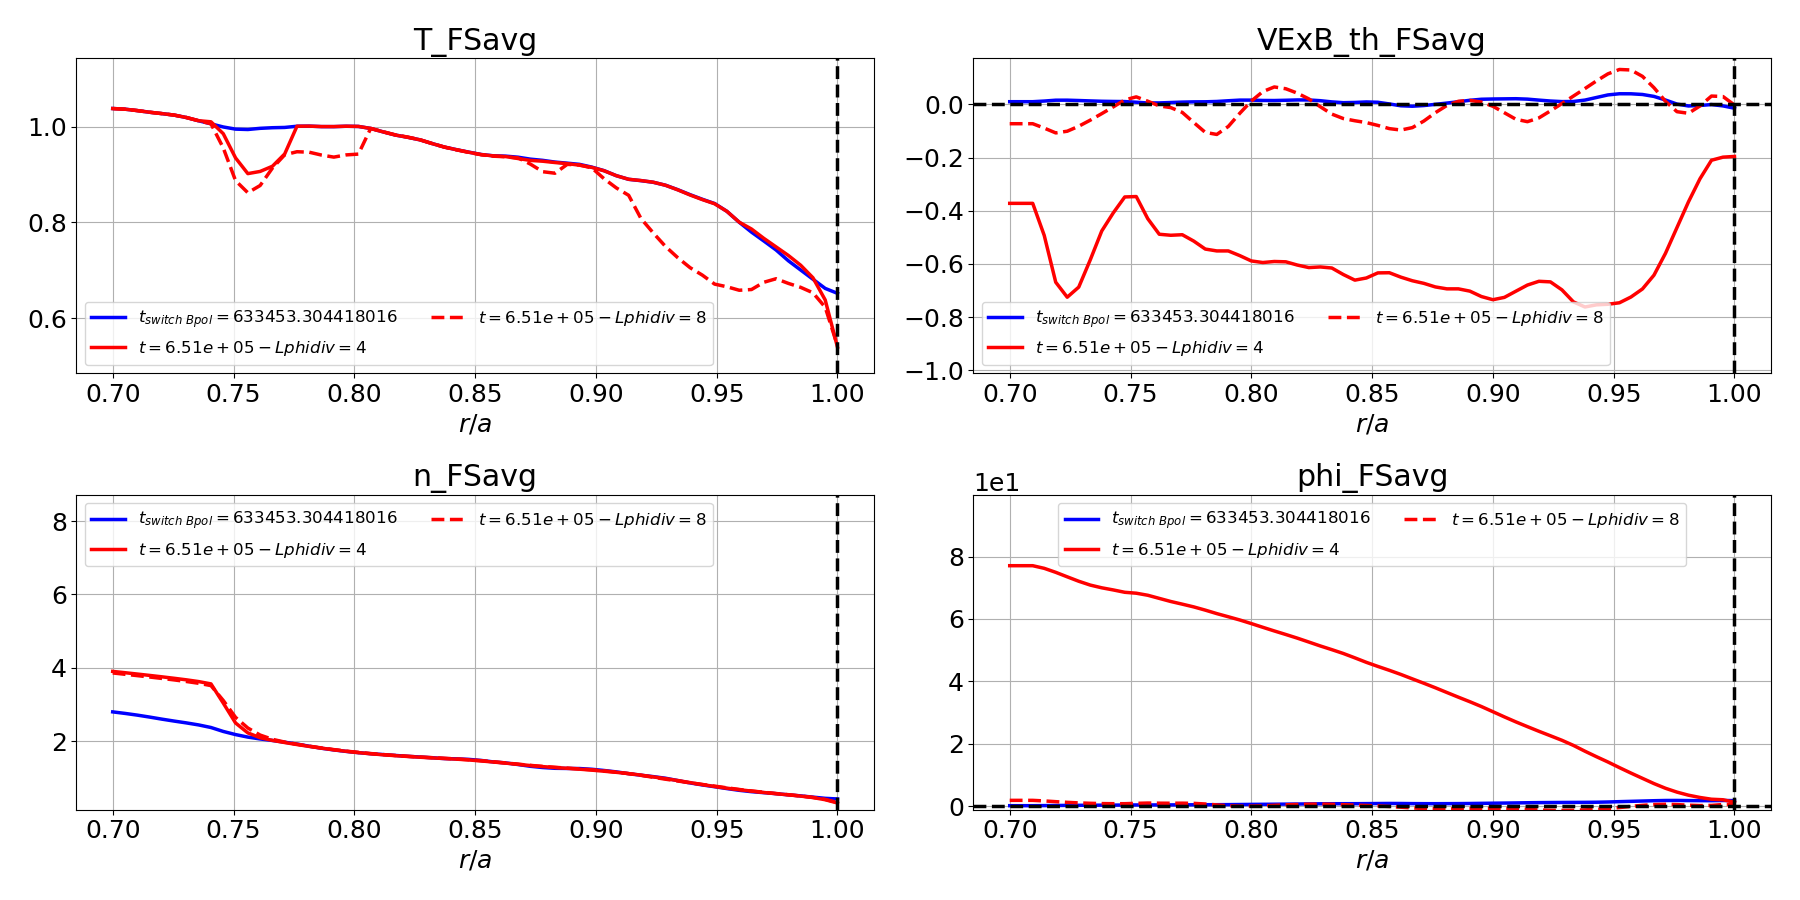

In [57]:
S3X_data     = hdf5_to_dict('data_S3X/data_allsim.h5'); S3X_data['title']=r'Restart $B_{pol}=2'; S3X_data['c']='xkcd:pinky red'; S3X_data['ls']='-'; S3X_data['time_activation']=633453.304418016; S3X_data['Lphidiv']=4
S3X_data_new = hdf5_to_dict('data_S3X/data_allsim_new.h5'); S3X_data_new['title']=r'Restart $B_{pol}=2'; S3X_data_new['c']='xkcd:pinky red'; S3X_data_new['ls']='-'; S3X_data_new['time_activation']=633453.304418016; S3X_data_new['Lphidiv']=8

fig = plt.figure(figsize=(18,9))

keys_ar = ['T_FSavg', 'VExB_th_FSavg', 'n_FSavg', 'phi_FSavg']
ax_ar = []
for i in range(len(keys_ar)):
    ax = fig.add_subplot(2,2,i+1)
    ax_ar.append(ax)

for ikey, keys in enumerate(keys_ar):
    rho_ar = np.linspace(0.7,1,S3X_data[keys].shape[1])
    ax=ax_ar[ikey]
    ax.clear()

    it_activation = np.argmin(np.abs(S3X_data['time'] - S3X_data['time_activation']))

    tscan = S3X_data_new['time'][-1]
    itscan = np.argmin(np.abs(S3X_data['time'] - tscan))

    ax.plot(rho_ar, S3X_data[keys][it_activation,:], c='b', ls='-', label=r'$t_{switch~Bpol} = %s$' %S3X_data['time_activation'])

    ax.plot(rho_ar, S3X_data[keys][itscan,:], c='r', ls='-', label=r'$t=%.2e  - Lphidiv = %s$' % (tscan,S3X_data['Lphidiv']))
    ax.plot(rho_ar, S3X_data_new[keys][-1,:], c='r', ls='--', label=r'$t=%.2e  - Lphidiv = %s$' % (tscan,S3X_data_new['Lphidiv']))

    
    
    ax.set_title(keys)
    ax.set_xlabel(r'$r/a$')
    ax.axhline(y=0, c='k', ls='--')
    ax.axvline(x=1, c='k', ls='--')
    ax.legend(fontsize=12, ncol=2)

    ax.set_ylim(np.amin(S3X_data[keys])*1.1, np.amax(S3X_data[keys])*1.1)

fig.tight_layout()